In [1]:
!ls -lh

total 16K
-rw-rw-r-- 1 jovyan jovyan 352 Dec 13 23:46 converting_model.py
-rw-rw-r-- 1 jovyan jovyan 12K Dec 15 22:12 homework-9.ipynb


In [2]:
pip install numpy==1.24


Note: you may need to restart the kernel to use updated packages.


In [3]:
ls -lh model_2024_hairstyle.keras


-rw-rw-r-- 1 jovyan jovyan 154M Dec 13 13:19 model_2024_hairstyle.keras


In [25]:
import numpy as np

In [5]:
#convert the model
import h5py
#h5py.File('model_2024_hairstyle.keras', 'r')
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('model_2024_hairstyle.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('hairstyle-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

2024-12-15 22:11:34.131888: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


OSError: Unable to open file (file signature not found)

## Question 1
Now convert this model from Keras to TF-Lite format.

What's the size of the converted model?

27 Mb  
43 Mb  
77 Mb  
127 Mb  

In [3]:
!pip install keras-image-helper

  Using cached keras_image_helper-0.0.1-py3-none-any.whl (4.6 kB)


In [4]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
  Using cached tflite_runtime-2.14.0-cp39-cp39-manylinux2014_x86_64.whl (2.4 MB)


In [59]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [60]:
interpreter = tflite.Interpreter(model_path='hairstyle-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

## Question 2
To be able to use this model, we need to know the index of the input and the index of the output.  

What's the output index for this model?  

3  
7  
13  
24  

In [61]:
input_index, output_index

(0, 13)

In [62]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [63]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [64]:
url='https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg'

In [87]:
img=download_image(url)

/tmp/ipykernel_142/2487457277.py:17: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize(target_size, Image.NEAREST)


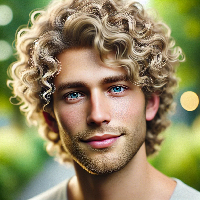

In [88]:
img=prepare_image(img, target_size=(200,200))
img

In [89]:
def preprocess_input(x):
    
    return x/255.0

In [90]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)


In [91]:
X[0:,0:5,0,0]

array([[0.23921569, 0.24313726, 0.26666668, 0.27450982, 0.3647059 ]],
      dtype=float32)

In [82]:
preprocessor = create_preprocessor('xception', target_size=(200, 200))

In [83]:
type(preprocessor)

keras_image_helper.preprocessors.XceptionPreprocessor

In [84]:

X = preprocessor.from_url(url)

In [85]:
type(X)

numpy.ndarray

In [86]:
X[0:,0:5,0,0]

array([[-0.52156866, -0.5137255 , -0.46666664, -0.45098037, -0.27058822]],
      dtype=float32)

## Question 3  
Now we need to turn the image into numpy array and pre-process it.  

Tip: Check the previous homework. What was the pre-processing we did there?  

After the pre-processing, what's the value in the first pixel, the R channel?  

0.24  # answer
0.44  
0.64  
0.84  

In [78]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)
preds.shape

(1, 1)

In [79]:
preds

array([[0.8934675]], dtype=float32)

## Question 4  
Now let's apply this model to this image. What's the output of the model?  

0.293  
0.493  
0.693  
0.893  

In [80]:
classes = [
    'straight',
    'curly'

]

dict(zip(classes, preds[0]))

{'straight': 0.8934675}

In [92]:
sudo apt-get update


SyntaxError: invalid syntax (2753851799.py, line 1)

In [93]:
sudo apt-get install -y docker.io


SyntaxError: invalid syntax (469666520.py, line 1)

In [95]:
!docker --version


Docker version 24.0.7, build 24.0.7-0ubuntu2~20.04.1
